Name: Pruthvi Shyam Billa

Course: BUDT704

Section: 501

Date: 10/21/22

# Video Game Analysis - TerpStudios

Recently, the sales of video games in the market have been decreasing. Analysis is required to gain insights so that the businesses in this industry thrives:

In [1]:
# Load the libraries required for the data analysis

import pandas as pd
import numpy as np
from numpy import nan as NA
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset

df = pd.read_csv('HW4-video-game-sales.csv', index_col=0)

# Display the dataframe 

df

,Name,Publisher:Platform,Year,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Rank,,,,,,,,
1,Wii Sports,Nintendo:Wii,2006,Sports,41.49,29.02,3.77,8.46
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Super Mario Bros.,Nintendo:NES,1985,Platform,29.08,3.58,6.81,0.77
3,Mario Kart Wii,Nintendo:Wii,2008,Racing,15.85,12.88,3.79,3.31
4,Wii Sports Resort,Nintendo:Wii,2009,Sports,15.75,11.01,3.28,2.96
...,...,...,...,...,...,...,...,...
16594,Woody Woodpecker in Crazy Castle 5,Kemco:GBA,2002,Platform,0.01,0,0,0
16595,Men in Black II: Alien Escape,Infogrames:GC,2003,Shooter,0.01,0,0,0
16596,SCORE International Baja 1000: The Official Game,Activision:PS2,2008,Racing,0,0,0,0


## 1. Clean Data
Let us calculate the percentage of clean observations in the dataset:

In [3]:
# Determine total values in the dataset

rows, columns = df.shape

# Update the values of Missing to None if present in any of the columns

for col in df.columns:
    df[df[col] == 'Missing'] = None

# Drop the duplicate observations and null values    

df_clean = df.drop_duplicates().dropna()

# Determine number of observations having clean data
clean_rows, clean_columns = df_clean.shape

# Special case: Determine if there are still any invalid years logically

df_year = df_clean['Year'].astype(int)
invalid_year_row = len(df_year[df_year > 2022])
print(f'Number of video games published after the current year in the dataset-invalid: {invalid_year_row}')

clean_rows -= invalid_year_row

# Determine and display the percentage of clean observations

percentage_clean_data = (clean_rows / rows) * 100
print(f'Percentage of missing values: {percentage_clean_data:0.2f}%')

Number of video games published after the current year in the dataset-invalid: 2
Percentage of missing values: 98.30%


In [4]:
# Delete observations in the data set that do not contain at least seven valid values.

df.dropna(thresh = 7, inplace = True)

## 2. Global Sales

Let us add a new column to see total sales over all the markets in the dataset:

In [5]:
# Convert the columns type so as to add the values into new column

df['NA_Sales'] = df['NA_Sales'].astype(float)
df['EU_Sales'] = df['EU_Sales'].astype(float)
df['JP_Sales'] = df['JP_Sales'].astype(float)
df['Other_Sales'] = df['Other_Sales'].astype(float)

# Determine global sales for each row

df['Global_Sales'] = df['NA_Sales'] + df['EU_Sales'] + df['JP_Sales'] + df['Other_Sales']

# Display first 15 rows

df.head(15)

,Name,Publisher:Platform,Year,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,
1,Wii Sports,Nintendo:Wii,2006,Sports,41.49,29.02,3.77,8.46,82.74
2,Super Mario Bros.,Nintendo:NES,1985,Platform,29.08,3.58,6.81,0.77,40.24
3,Mario Kart Wii,Nintendo:Wii,2008,Racing,15.85,12.88,3.79,3.31,35.83
4,Wii Sports Resort,Nintendo:Wii,2009,Sports,15.75,11.01,3.28,2.96,33.00
5,Pokemon Red/Pokemon Blue,Nintendo:GB,1996,Role-Playing,11.27,8.89,10.22,1.00,31.38
6,Tetris,Nintendo:GB,1989,Puzzle,23.20,2.26,4.22,0.58,30.26
7,New Super Mario Bros.,Nintendo:DS,2400,Platform,11.38,9.23,6.50,2.90,30.01
8,Wii Play,Nintendo:Wii,2006,Misc,14.03,9.20,2.93,2.85,29.01
9,New Super Mario Bros. Wii,Nintendo:Wii,2009,Platform,14.59,7.06,4.70,2.26,28.61


## 3. Formatted table and data clean of columns

For better analysis, let us create a new formatted table with proper columns:

In [6]:
# Split the columns

df[['Publisher','Platform']] = df['Publisher:Platform'].str.split(pat=":", expand=True)

# Create a new dataframe

format_table = df[['Name','Publisher','Platform','Global_Sales']]

# Select the top 15 ranks of the video games and sort

format_table = format_table.iloc[:14,:]
format_table.sort_values(by=['Global_Sales'], ascending=False, inplace= True)

# Rename the columns

format_table.rename(columns={"Name": "Video Game Name", "Global_Sales":"Global Sales Amount"}, inplace= True)

# Display the formatted dataframe

format_table

,Video Game Name,Publisher,Platform,Global Sales Amount
Rank,,,,
1,Wii Sports,Nintendo,Wii,82.74
2,Super Mario Bros.,Nintendo,NES,40.24
3,Mario Kart Wii,Nintendo,Wii,35.83
4,Wii Sports Resort,Nintendo,Wii,33.00
5,Pokemon Red/Pokemon Blue,Nintendo,GB,31.38
6,Tetris,Nintendo,GB,30.26
7,New Super Mario Bros.,Nintendo,DS,30.01
8,Wii Play,Nintendo,Wii,29.01
9,New Super Mario Bros. Wii,Nintendo,Wii,28.61


Let us now remove the column permanently from the dataframe:

Note: Video game 'Duck Hunt' does not have sales value under Other Markets. Therefore, for global sales we are not storing the other three markets aggregate, namely North America, Europe, and Japan in corresponding global sales for analysis purpose. After sort it is stored at the last with null value in global sales amount. Also, for this formatted table we are just considering video games of ranks 1 to 15 in original dataframe rather than that of dataframe after removing dirty data.

In [7]:
# Drop the column

df.drop(columns = 'Publisher:Platform', inplace= True)

# Display the dataframe, with top 15 rows
df.head(15)

,Name,Year,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Publisher,Platform
Rank,,,,,,,,,,
1,Wii Sports,2006,Sports,41.49,29.02,3.77,8.46,82.74,Nintendo,Wii
2,Super Mario Bros.,1985,Platform,29.08,3.58,6.81,0.77,40.24,Nintendo,NES
3,Mario Kart Wii,2008,Racing,15.85,12.88,3.79,3.31,35.83,Nintendo,Wii
4,Wii Sports Resort,2009,Sports,15.75,11.01,3.28,2.96,33.00,Nintendo,Wii
5,Pokemon Red/Pokemon Blue,1996,Role-Playing,11.27,8.89,10.22,1.00,31.38,Nintendo,GB
6,Tetris,1989,Puzzle,23.20,2.26,4.22,0.58,30.26,Nintendo,GB
7,New Super Mario Bros.,2400,Platform,11.38,9.23,6.50,2.90,30.01,Nintendo,DS
8,Wii Play,2006,Misc,14.03,9.20,2.93,2.85,29.01,Nintendo,Wii
9,New Super Mario Bros. Wii,2009,Platform,14.59,7.06,4.70,2.26,28.61,Nintendo,Wii


## 4. Data Operations

Let us perform some data operations to gain insights:


In [8]:
# Determine number of video games were published by Nintendo
count = df['Publisher'].value_counts()['Nintendo']

print(f'Number of video games by Nintendo: {count}')

Number of video games by Nintendo: 702


In [9]:
# Determine how many video games have word Super within its title

df_temp = df[df['Name'].str.contains("Super") == True ]

print(f'Number of video games having only Super in the title: {len(df_temp)}')

Number of video games having only Super in the title: 385


In [10]:
# Determine number of video games have reached sales of at least $20 million in at least one market

count1 = len(df[ (df['NA_Sales'] >= 20.00) | (df['EU_Sales'] >= 20.00) | (df['JP_Sales'] >= 20.00) | (df['Other_Sales'] >= 20.00)])
print(f'Number of video games having sales greater than $20 million, {count1}')


Number of video games having sales greater than $20 million, 4


In [11]:
# Determine percentage of video games released after 2002 and have global sales greater than $2 million

df[(df['Year'] >= '2002') & (df['Global_Sales'] >= 2.00)]

percentage =( len(df[(df['Year'] >= '2002') & (df['Global_Sales'] >= 2.00)])/ len( df[(df['Year'] >= '2002')] ) ) * 100
print(f'percentage of video games released after 2002 and have global sales greater than $2 million: {percentage:0.2f}%')

percentage of video games released after 2002 and have global sales greater than $2 million: 4.49%


Let us create a correlation matrix, which is a square table that shows the correlation coefficients between several variables:

Correlation coefficient: a measure of the linear association between two variables. It has a value between -1 and 1 where:

-  -1 indicates a perfectly negative linear correlation between two variables
-  0 indicates no linear correlation between two variables
-  +1 indicates a perfectly positive linear correlation between two variables

## 5. Correlation Matrix

In [12]:
# Correlation Matrix

df.corr()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
NA_Sales,1.000000,0.765962,0.443597,0.652019,0.945460
EU_Sales,0.765962,1.000000,0.427718,0.727259,0.909880
JP_Sales,0.443597,0.427718,1.000000,0.290052,0.610489
Other_Sales,0.652019,0.727259,0.290052,1.000000,0.755407
Global_Sales,0.945460,0.909880,0.610489,0.755407,1.000000


Correlation coefficients along the diagonal of the table are all equal to 1 because each variable is perfectly correlated with itself.


Observations:
1. The correlation between Global and North American sales for video games is 0.945, which indicates that they’re very strongly positively correlated.
2. Whereas, the correlation between Japan and Europe sales is 0.427, indicating that they are moderately correlated.


Inferences:

1. Over the years, it seems that the video games mentioned in the dataset were popular among the citizens of North America. This has led to increase in the sales in this market contributing to a large share in overall global sales. Also, probably the publishers in North America have done penetration pricing and excessive marketing for the video games leading to greater sales compared to markets in other regions.

2. Although there is a positive correlation among the sales of Japan and Europe for the video games, it is not that strong. Video games have not fared in a similar fashion in European and Japan markets. There seems to be some variance among these variables. We could say people in Europe have different preferences in genres of video games compared to those in Japan. We have famous football leagues in Europe such as English Premier league, La liga, and Bundesliga that might have probably impacted towards popularity in Sports among youth and children. When we compare the sales of this genre for the top 10 ranked video games, it is evident that Europe has higher sales than Japan. 


In [13]:
# Correlation matrix for year 2000

df_2000 = df[df['Year'] == '2000']
df_2000.corr()


,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
NA_Sales,1.000000,0.866555,0.139115,0.691317,0.900914
EU_Sales,0.866555,1.000000,0.108401,0.748552,0.866584
JP_Sales,0.139115,0.108401,1.000000,0.226852,0.512328
Other_Sales,0.691317,0.748552,0.226852,1.000000,0.762164
Global_Sales,0.900914,0.866584,0.512328,0.762164,1.000000


In [14]:
# Correlation matrix for year 2015

df_2015 = df[df['Year'] == '2015']
df_2015.corr()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
NA_Sales,1.000000,0.736844,0.123217,0.866672,0.911533
EU_Sales,0.736844,1.000000,0.132160,0.926506,0.922360
JP_Sales,0.123217,0.132160,1.000000,0.126803,0.307129
Other_Sales,0.866672,0.926506,0.126803,1.000000,0.956571
Global_Sales,0.911533,0.922360,0.307129,0.956571,1.000000


Observations:

When comparing the sales globally between the years 2000 and 2015:

1. The correlation has minimally increased in the markets of North America and Europe. But, for sales in other markets, it increased from 0.76 to 0.95. This is a significant development over the given 15 years for the video game industry.

2. In contrast, the sales for video games in Japan has decreased to 0.3, indicating a weak correlation relatively to the year 2000. 


Inferences:

1. Publishers of the video game industry were successful to increase their sales in these markets. Strategies to meet the demand of the gamers have worked probably beacuse of strong cross sided network effects. Here, the two sides of the platform are the game developers and the gamers. Interestingly, for Other markets the sales have increased dramatically over the 15-year period. Schools adding video games to their curriculum have helped this growth. Also, this could be attributed to increase in the gaming competitions offering hefty prizes for the winners.

2. In Japan, due to advances in the development of the digital technologies, video game industry had a huge impact when compared globally. Digital goods are cheap to reproduce and can be easily distributed over the internet. Piracy of the video game CDs was a major issue in the given period, and necessary measures should have been taken similar to other regions.



## 6. Genre

In [15]:
# Group the category genre for recommendation for the company to create the next game

group_df = df.groupby(['Genre'])

# Sort the values from highest to lowest of the global sales

group_df.sum().sort_values('Global_Sales', ascending= False)


,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Genre,,,,,
Action,877.83,525.00,159.95,187.38,1750.16
Sports,683.35,376.85,135.37,134.97,1330.54
Shooter,582.60,313.27,38.28,102.22,1008.53
Role-Playing,318.28,181.88,345.11,58.90,904.17
Platform,447.05,201.63,130.77,51.59,831.04
Misc,410.24,215.98,107.76,75.32,809.30
Racing,359.42,238.39,56.69,77.27,731.77
Fighting,223.59,101.32,87.35,36.68,448.94
Simulation,183.31,113.38,63.70,31.52,391.91


Recommendations:

We have grouped the genres according to the sales in different markets and have sorted from highest to lowest with repect to global sales.
Overall, Action genre has the highest and Strategy has the lowest global sales.
The company should create an Action-Sports themed video game so that it can have more sales and profits globally.



### Let us create a visulaization to do analysis on Genre:

There are [3316 1286  848 1739  886  582 1249 1487 1310  867 2346  681] number of games ['Action' 'Adventure' 'Fighting' 'Misc' 'Platform' 'Puzzle' 'Racing'
 'Role-Playing' 'Shooter' 'Simulation' 'Sports' 'Strategy'] categories respectively in the dataset


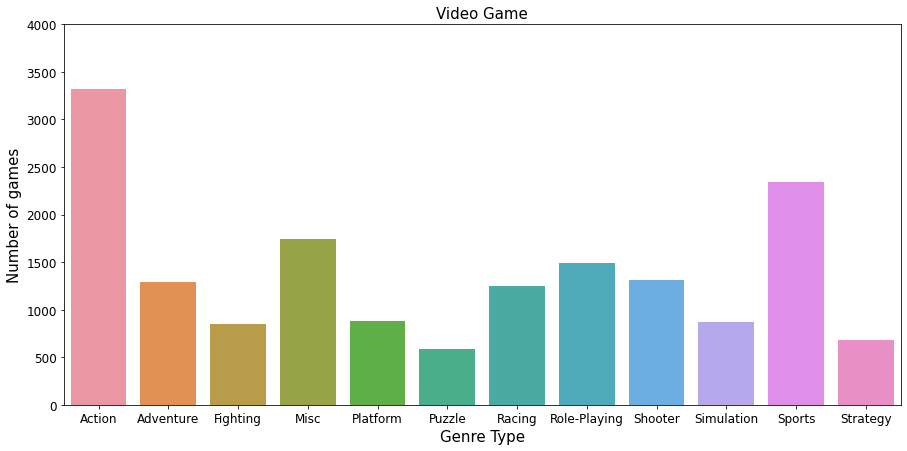

In [16]:
# Convert Genre to numpy array

genre_array = df[["Genre"]].to_numpy()

# Determine unique values and their frequencies

genre_array_unique, genre_array_frequency = np.unique(genre_array, return_counts=True)
print(f'There are {genre_array_frequency} number of games {genre_array_unique} categories respectively in the dataset')

# Bar chart 

plt.rcParams["figure.figsize"] = (15,7)
sns.barplot(x=genre_array_unique, y=genre_array_frequency)


# Chart Title

plt.title('Video Game', fontsize=15)

# Horizontal axis attributes

plt.xlabel('Genre Type', fontsize=15)
plt.xticks(fontsize=12)

# Vertical axis attributes

plt.yticks(fontsize=12)
plt.ylabel('Number of games', fontsize=15)
plt.ylim(0,4000)

# Display plot

plt.show()

Observation:
The above bar chart illustrates different genres of the video game industry that were published on various platforms.
To begin with, there were only two genre categories which had more than 2000 video games released in the dataset. Action genre had the highest number of video games(3316) followed by Sports(2346).

Furthermore, publishers were less inclined compared to other genre categories. Surprisingly, adventure, racing, role-playing, and shooter genres had approximately similar counts of number of games in the dataset.

Inference:

Since publishers have shown preferences for Action and Sports genres, it can be inferred that the demand for these games were dominant among all the categories on global level. Also, a lot of action movies were released during these years helping publishers have take advantage of the markets so as to increase their profit margins. Similarly, sports video games such as NBA, Football and Cricket are very popular. Many people who could not afford time to play outdoor in their busy schedules prefer playing these games on computers.

"I pledge on my honor that I have not given nor received any unauthorized
     assistance on this assignment."

--Pruthvi Shyam Billa